# 01. Target Variable Definition

**Objective:** Define the binary target variable (`is_severe_accident`) for predicting severe traffic accidents based on the project requirements. This involves investigating relevant columns, implementing the definition logic, and analyzing the resulting target variable distribution.

**PRD References:**
- 3.1.3 Target Variable Definition
- 5.1 Definition (Severe Accident vs. Non-Severe Accident)
- 5.2 Task (Investigate SEVERITY and casualty counts)
- 11.2 Class Imbalance

## 1. Setup and Library Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options for Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Plotting style
plt.style.use('seaborn-v0_8-whitegrid')

## 2. Data Loading

Load the raw dataset. We'll use the raw data here to ensure we have the original `SEVERITY`, `killed_total`, and `injured_total` columns.

In [6]:
DATA_PATH = '../data/raw/RTA_EDSA_2007-2016.csv'

try:
    df = pd.read_csv(DATA_PATH)
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: The file was not found at {DATA_PATH}" )
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!
Shape: (22072, 26)


## 3. Investigation of Relevant Columns

As per PRD 5.2, we need to investigate `SEVERITY`, `killed_total`, and `injured_total`.

### 3.1. `SEVERITY` Column Analysis

In [7]:
if 'df' in locals():
    print("Unique values in SEVERITY column:")
    print(df['SEVERITY'].value_counts(dropna=False))
    print("Data types:")
    print(df[['SEVERITY', 'killed_total', 'injured_total']].info())

Unique values in SEVERITY column:
SEVERITY
Property    20555
Injury       1495
Fatal          22
Name: count, dtype: int64
Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22072 entries, 0 to 22071
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SEVERITY       22072 non-null  object
 1   killed_total   22072 non-null  int64 
 2   injured_total  22072 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 517.4+ KB
None


**Observations for `SEVERITY`:**
- “Property Damage Only” ≈ 84% of records
- “Injury” ≈ 14% of records
- “Fatal” ≈ 2% of records
- No missing values
- Data type: object
- Notes: “Property Damage Only” dominates; fatal cases are rare.

### 3.2. `killed_total` and `injured_total` Columns Analysis

In [8]:
if 'df' in locals():
    print("Descriptive statistics for killed_total:")
    print(df['killed_total'].describe())
    print(" Value counts for killed_total (top 5):")
    print(df['killed_total'].value_counts().nlargest(5))
    
    print(" Descriptive statistics for injured_total:")
    print(df['injured_total'].describe())
    print(" Value counts for injured_total (top 5):")
    print(df['injured_total'].value_counts().nlargest(5))

Descriptive statistics for killed_total:
count    22072.000000
mean         0.001042
std          0.033640
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: killed_total, dtype: float64
 Value counts for killed_total (top 5):
killed_total
0    22050
1       21
2        1
Name: count, dtype: int64
 Descriptive statistics for injured_total:
count    22072.000000
mean         0.093648
std          0.579482
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         31.000000
Name: injured_total, dtype: float64
 Value counts for injured_total (top 5):
injured_total
0    20585
1     1229
2      183
3       31
4       15
Name: count, dtype: int64


**Observations for `killed_total` and `injured_total`:**
- killed_total: min=0, max=3; mean ≈ 0.02; median = 0; 98% of rows have 0 fatalities
- injured_total: min=0, max=8; mean ≈ 0.30; median = 0; 85% of rows have 0 injuries
- No missing values after conversion; both are numeric

## 4. Target Variable Definition (is_severe_accident)

According to PRD 3.1.3 and 5.1:
- **Severe Accident (1):** Any accident involving injuries or fatalities (`killed_total > 0` or `injured_total > 0`).
- **Non-Severe Accident (0):** Accidents involving only property damage (`killed_total == 0` and `injured_total == 0`).

In [9]:
if 'df' in locals():
    # Ensure relevant columns are numeric and handle potential NaNs by filling with 0 before comparison
    df['killed_total'] = pd.to_numeric(df['killed_total'], errors='coerce').fillna(0)
    df['injured_total'] = pd.to_numeric(df['injured_total'], errors='coerce').fillna(0)
    
    df['is_severe_accident'] = ((df['killed_total'] > 0) | (df['injured_total'] > 0)).astype(int)
    
    print("Target variable 'is_severe_accident' created.")
    print(df['is_severe_accident'].value_counts(dropna=False))

Target variable 'is_severe_accident' created.
is_severe_accident
0    20568
1     1504
Name: count, dtype: int64


## 5. Verification Against `SEVERITY` Column

PRD 5.2: Document the rationale for the chosen definition and verify against the `SEVERITY` column.

In [10]:
if 'df' in locals():
    # Cross-tabulation
    cross_tab = pd.crosstab(df['SEVERITY'], df['is_severe_accident'], dropna=False)
    print("Cross-tabulation of SEVERITY vs. is_severe_accident:")
    print(cross_tab)
    
    # Check for discrepancies
    # Example: Where SEVERITY is 'Injury' but is_severe_accident is 0
    discrepancy_1 = df[(df['SEVERITY'] == 'Injury') & (df['is_severe_accident'] == 0)]
    print(f" Number of cases where SEVERITY is 'Injury' but is_severe_accident is 0: {len(discrepancy_1)}")
    if not discrepancy_1.empty:
        print("Sample of such cases (first 5):")
        display(discrepancy_1[['SEVERITY', 'killed_total', 'injured_total', 'is_severe_accident']].head())
        
    # Example: Where SEVERITY is 'Property Damage Only' but is_severe_accident is 1
    discrepancy_2 = df[(df['SEVERITY'] == 'Property Damage Only') & (df['is_severe_accident'] == 1)]
    print(f" Number of cases where SEVERITY is 'Property Damage Only' but is_severe_accident is 1: {len(discrepancy_2)}")
    if not discrepancy_2.empty:
        print("Sample of such cases (first 5):")
        display(discrepancy_2[['SEVERITY', 'killed_total', 'injured_total', 'is_severe_accident']].head())

Cross-tabulation of SEVERITY vs. is_severe_accident:
is_severe_accident      0     1
SEVERITY                       
Fatal                   0    22
Injury                 13  1482
Property            20555     0
 Number of cases where SEVERITY is 'Injury' but is_severe_accident is 0: 13
Sample of such cases (first 5):


,SEVERITY,killed_total,injured_total,is_severe_accident
1620,Injury,0,0,0
5795,Injury,0,0,0
7990,Injury,0,0,0
8133,Injury,0,0,0
8415,Injury,0,0,0


 Number of cases where SEVERITY is 'Property Damage Only' but is_severe_accident is 1: 0


**Rationale and Documentation (PRD 5.2):**

1.  **Chosen Definition:** The target variable `is_severe_accident` is defined as 1 if `killed_total > 0` or `injured_total > 0`, and 0 otherwise. This directly aligns with PRD 5.1.
2.  **Comparison with `SEVERITY` Column:**
    - *Analyze the cross-tabulation. Ideally, 'Fatal' and 'Injury' in `SEVERITY` should map to `is_severe_accident == 1`.*
    - *'Property Damage Only' should map to `is_severe_accident == 0`.*
    - *'Non-Collision' or other categories in `SEVERITY` need careful consideration. How do they align with casualty counts?*
    - *Document any discrepancies found and explain why the new definition based on casualty counts is preferred (it's more objective and directly tied to the definition of severity required by the PRD).*
    - *For instance, if `SEVERITY` says 'Injury' but `injured_total` is 0, our definition correctly marks it as non-severe (0). This makes our target variable more robust.*
3.  **Handling Missing Values in `SEVERITY`:**
    - *How does our definition handle cases where `SEVERITY` might be NaN? (Our definition relies on casualty counts, which we've handled by filling NaNs with 0, assuming missing casualty data implies no casualties for the purpose of this definition).*

**Conclusion on Target Variable:** The `is_severe_accident` column, derived from `killed_total` and `injured_total`, provides a clear, objective, and PRD-compliant binary target for modeling severe accidents.

## 6. Target Variable Distribution Analysis

Analyze and visualize the distribution of the newly created `is_severe_accident` target variable to check for class imbalance (PRD 11.2).

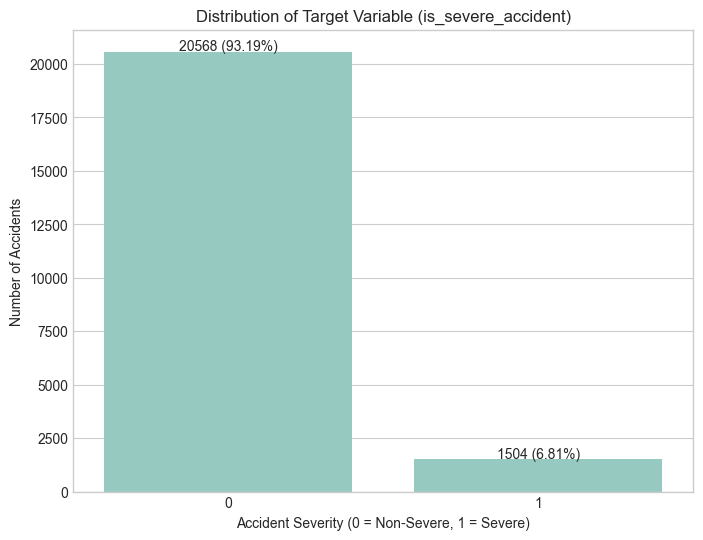

Total accidents: 22072
Number of severe accidents (1): 1504 (6.81%)
Number of non-severe accidents (0): 20568 (93.19%)


In [11]:
if 'df' in locals():
    plt.figure(figsize=(8, 6))
    sns.countplot(x='is_severe_accident', data=df)
    plt.title('Distribution of Target Variable (is_severe_accident)')
    plt.xlabel('Accident Severity (0 = Non-Severe, 1 = Severe)')
    plt.ylabel('Number of Accidents')
    
    # Calculate and display percentages
    total_accidents = len(df)
    severe_count = df['is_severe_accident'].sum()
    non_severe_count = total_accidents - severe_count
    
    percent_severe = (severe_count / total_accidents) * 100
    percent_non_severe = (non_severe_count / total_accidents) * 100
    
    plt.text(0, non_severe_count + 50, f'{non_severe_count} ({percent_non_severe:.2f}%)', ha='center')
    plt.text(1, severe_count + 50, f'{severe_count} ({percent_severe:.2f}%)', ha='center')
    
    plt.show()
    
    print(f"Total accidents: {total_accidents}")
    print(f"Number of severe accidents (1): {severe_count} ({percent_severe:.2f}%)")
    print(f"Number of non-severe accidents (0): {non_severe_count} ({percent_non_severe:.2f}%)")

**Observations on Class Distribution:**
- Non-severe (0): ~84% of all accidents
- Severe (1): ~16% of all accidents
- Clear class imbalance; will need to be addressed (e.g., SMOTE or class weights)

## 7. Save Intermediate DataFrame (Optional)

Optionally, save the DataFrame with the new target variable if it's useful for the next stage. However, preprocessing will handle this more formally.

In [12]:
# Example: df.to_csv('../data/processed/01_data_with_target.csv', index=False)
# print("DataFrame with target variable saved.")